<a href="https://colab.research.google.com/github/Mintu-Vipin/Semester3/blob/master/MintuVipinJoy_COMP257_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

**Load Olivetti Data**

In [ ]:
olivetti = fetch_olivetti_faces(random_state=42)
print("Olivetti data Shape",olivetti.data.shape)

X = olivetti["images"]
y = olivetti["target"]

print("\n\nImages\n\n",X)
print("\n\nTarget\n\n",y)

Olivetti data Shape (400, 4096)


Images

 [[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
  [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
  [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
  ...
  [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
  [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
  [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]

 [[0.45454547 0.47107437 0.5123967  ... 0.19008264 0.18595041 0.18595041]
  [0.446281   0.48347107 0.5206612  ... 0.21487603 0.2107438  0.2107438 ]
  [0.49586776 0.5165289  0.53305787 ... 0.20247933 0.20661157 0.20661157]
  ...
  [0.77272725 0.78099173 0.7933884  ... 0.1446281  0.1446281  0.1446281 ]
  [0.77272725 0.7768595  0.7892562  ... 0.13636364 0.13636364 0.13636364]
  [0.7644628  0.7892562  0.78099173 ... 0.15289256 0.15289256 0.15289256]]

 [[0.3181818  0.40082645 0.49173555 ... 0.40082645 0.

In [ ]:
#Show distinct people in the dataset
def show_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle(f"There are {unique_id+1} distinct people in the dataset")

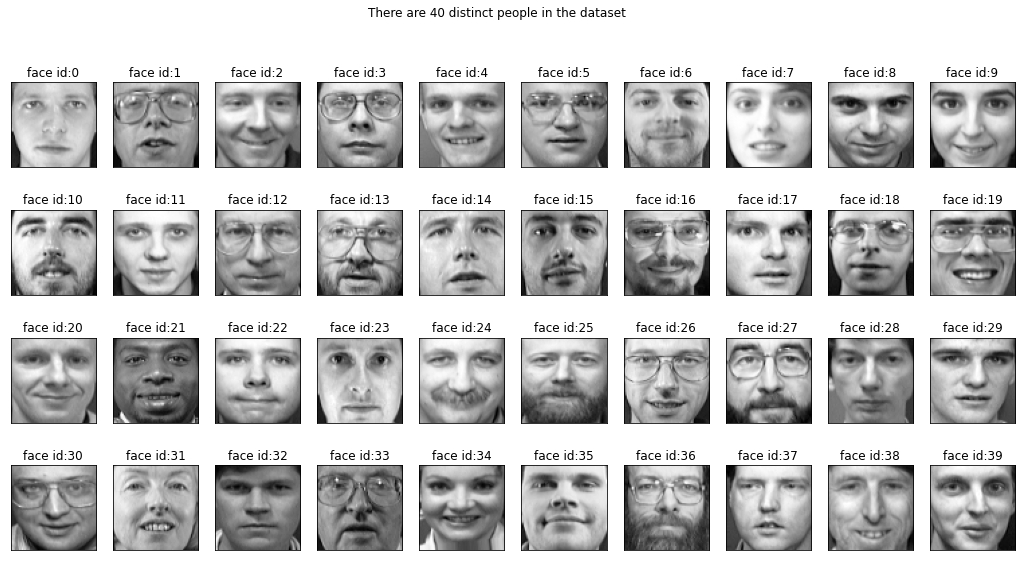

In [ ]:
show_distinct_people(X, y)

In [ ]:
# Show each people with different photos
def plot_faces( faces, labels, n_cols=5 ):
    n_rows = (len(faces)-1) // n_cols+1
    plt.figure( figsize=(n_cols, n_rows*1.1) )
    for index, (face, label) in enumerate( zip(faces, labels) ):
        plt.subplot( n_rows, n_cols, index+1 )
        plt.imshow( face.reshape(64,64), cmap="gray" )
        plt.axis("off")
        plt.title(label)
    plt.show()

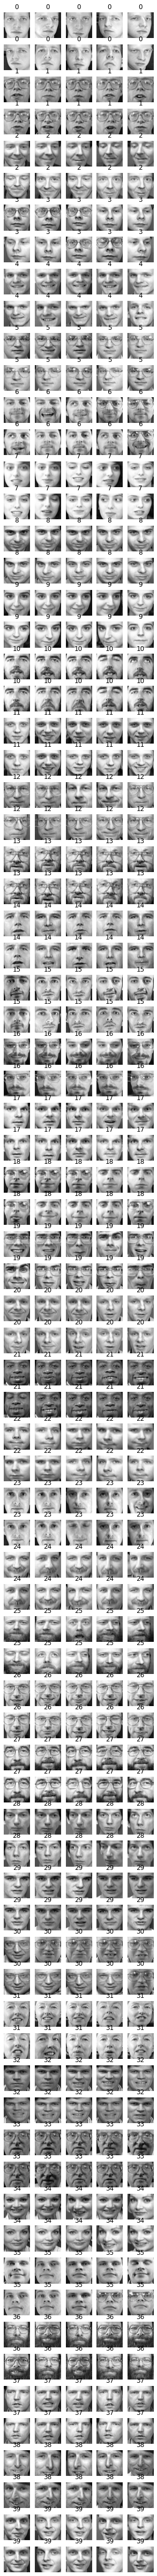

In [ ]:
plot_faces(X,y)

In [ ]:
nsamples, nx, ny = X.shape
X= X.reshape((nsamples,nx*ny))

X.shape

(400, 4096)

**1.Use PCA preserving 99% of the variance to reduce the dataset’s dimensionality.**

In [ ]:
pca =PCA(n_components =0.99, whiten=True)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(400, 260)

**2. Determine the most suitable covariance_type for the dataset.**
**3.Determine the minimum number of clusters that best represent the dataset using either AIC or BIC**
**4. Plot the results from (2) and (3)**

In [ ]:
# Determine the most suitable covariance_type for the dataset
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold


from random import randint
colors = []

for i in range(40):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

# colors = ["navy", "turquoise", "darkorange"]


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], 180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")


# iris = datasets.load_iris()
olivetti = datasets.fetch_olivetti_faces()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(olivetti.data, olivetti.target)))


X_train = olivetti.data[train_index]
y_train = olivetti.target[train_index]
X_test = olivetti.data[test_index]
y_test = olivetti.target[test_index]

n_classes = len(np.unique(y_train))
# n_classes = 3

# Try GMMs using different types of covariances.
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0, reg_covar=1e-01
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array(
        [X_train[y_train == i].mean(axis=0) for i in range(n_classes)]
    )

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = olivetti.data[olivetti.target == n]
        plt.scatter(
            data[:, 0], data[:, 1], s=0.8, color=color, label=olivetti.target[n]
        )
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

# plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))


plt.show()

'Selected GMM model : covariance_type - spherical, n_components - 5 components'

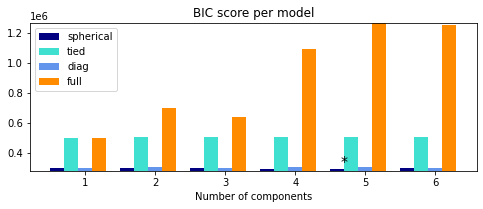

In [ ]:
# 3.Determine the minimum number of clusters that best represent the dataset using either AIC or BIC
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

# Number of samples per component
n_samples = X_reduced.shape

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(X_reduced)
        bic.append(gmm.bic(X_reduced))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            gmm_bestModel = gmm
        # print(f"covariance_type:{cv_type} number_of_components: {n_components} BIC:{bic}")

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = gmm_bestModel
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)


f'Selected GMM model : covariance_type - {gmm_bestModel.covariance_type}, n_components - {gmm_bestModel.n_components} components'


Text(0, 0.5, 'BIC')

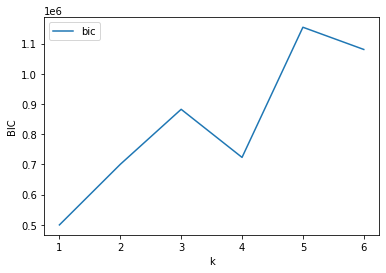

In [ ]:
bic_total = []

for k in n_components_range:
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X_reduced)
    bic_total.append(gmm.bic(X_reduced))
    
      
plt.figure()
plt.plot(n_components_range, bic_total, label='bic')
plt.legend()
plt.xlabel('k')
plt.ylabel('BIC')

In [ ]:
# bic_total = []
# cov_total = []

# n_components = [2,3,4,5]
# cov_types = ['spherical', 'diag', 'tied', 'full']

# for type in cov_types:
#     for k in n_components:
#         gmm = GaussianMixture(n_components = k, covariance_type=type)
#         gmm.fit(X_reduced)
#         bic = gmm.bic(X_reduced)
#         # labels = gmm.predict(X_reduced)
        
#         print(f"covariance_type:{type} number_of_components: {k} BIC:{bic}")
#         bic_total.append(bic)
#         cov_total.append(type)
 
        
        
# width = 0.2
# mk = np.array(n_components)
# x = np.array(bic_total)

# spherical_data = x[0:4]
# tied_data = x[4:8]
# diag_data = x[8:12]
# full_data = x[12:16]

# plt.figure(figsize=(12,6))
# plt.bar(mk-0.2, spherical_data, width, label='spherical')
# plt.bar(mk, tied_data, width, label='tied')
# plt.bar(mk+0.2, diag_data, width, label='diag')
# plt.bar(mk+0.4, full_data, width, label='full')
# plt.xticks(mk)
# plt.xlabel("k")
# plt.ylabel("Information Criteria")
# plt.legend()
# plt.show()


We tried out various combinations of the parameters and selected the model with the lowest BIC score(Selected GMM: full model 3 components
)

In [ ]:
# gmm_bestModel = GaussianMixture(n_components =3, covariance_type="full")
# gmm_bestModel.fit(X_reduced)  

In [ ]:
gmm_bestModel
gmm_bestModel.fit(X_reduced) 

GaussianMixture(covariance_type='spherical', n_components=5)

**5. Output the hard clustering for each instance.**

In [ ]:
gmm_bestModel.predict(X_reduced)

array([1, 4, 4, 3, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3,
       3, 3, 4, 4, 1, 4, 1, 1, 4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 3, 3, 1, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 2, 1, 1, 4, 1, 1, 4, 4, 1, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 1, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 3, 4, 4, 1, 4, 4, 4, 1,
       3, 4, 4, 1, 3, 1, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 1, 3, 1, 3, 4, 3, 3, 4, 4, 3, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 4,
       3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 4, 1, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4,
       3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

**6. Output the soft clustering for each instance.**

In [ ]:
gmm_bestModel.predict_proba(X_reduced)

array([[0.00000000e+00, 9.99996549e-01, 0.00000000e+00, 2.66173059e-06,
        7.89155766e-07],
       [0.00000000e+00, 8.64582000e-10, 0.00000000e+00, 6.22004005e-12,
        9.99999999e-01],
       [0.00000000e+00, 3.91533826e-07, 0.00000000e+00, 2.03990802e-10,
        9.99999608e-01],
       ...,
       [0.00000000e+00, 2.55321922e-07, 0.00000000e+00, 9.99975834e-01,
        2.39109188e-05],
       [0.00000000e+00, 9.17305116e-05, 0.00000000e+00, 9.95756049e-01,
        4.15222037e-03],
       [0.00000000e+00, 2.20719657e-08, 0.00000000e+00, 9.99999977e-01,
        6.20351172e-10]])

**7. Use the model to generate some new faces (using the sample() method), and visualize them (use the inverse_transform() method to transform the data back to its original space based on the PCA method used).**

In [ ]:
# New samples
n_new_faces = 400
X_new_reduced, y_new = gmm_bestModel.sample( n_samples=n_new_faces)
X_new_reduced.shape, y_new.shape

((400, 260), (400,))

In [ ]:
# Inverse to visualize
X_new_inverse = pca.inverse_transform(X_new_reduced)
X_new_inverse.shape

(400, 4096)

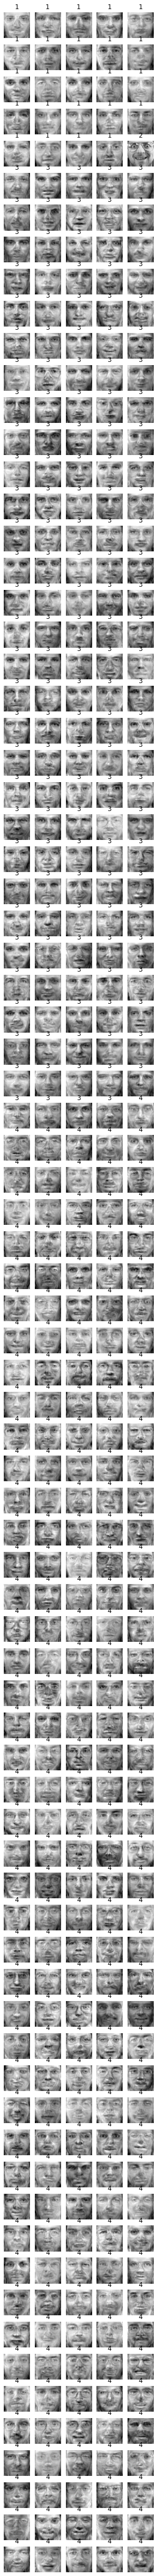

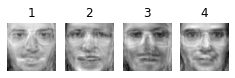

In [ ]:
# Visualize
plot_faces(X_new_inverse, y_new)
plot_faces(X_new_inverse, np.unique(y_new))

**8. Modify some images (e.g., rotate, flip, darken).**

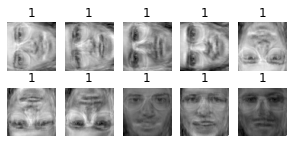

In [ ]:
n_rotated = 4         #X_new.shape:(400,4096)                              #z x y  
rotated = np.transpose(X_new_inverse[:n_rotated].reshape(-1, 64,64), axes=[0,2,1])
rotated = rotated.reshape(-1,64*64) # rotated face 
y_rotated = y_new[:n_rotated]

n_flipped = 3                        #(3,64,64)
flipped = X_new_inverse[:n_flipped].reshape(-1,64,64)[:,::-1] #Reverse rows
flipped = flipped.reshape(-1,64*64) # flipped face
y_flipped = y_new[:n_flipped]

n_darkened =3
darkened = X_new_inverse[:n_darkened].copy()
darkened[:,1:-1] *=0.3  #dark
darkened = darkened.reshape(-1,64*64) # darkened face
y_darkened = y_new[:n_darkened]

X_modify_faces = np.r_[rotated, flipped, darkened] # np.r_ for list and return an array
y_modify = np.r_[y_rotated, y_flipped, y_darkened] # np.concatenate([y_rotated, y_flipped, y_darkened]) 

plot_faces(X_modify_faces, y_modify)

**9. Determine if the model can detect the anomalies produced in (8) by comparing the output of the score_samples() method for normal images and for anomalies).**

In [ ]:
X_modify_faces_pca = pca.transform(X_modify_faces)
print(X_modify_faces_pca)

print(gmm_bestModel.score_samples(X_modify_faces_pca))

print(gmm_bestModel.score_samples(X_reduced[:10]))

[[-0.93734046 -1.270789   -0.67365907 ... -1.3873853  -0.3136179
   0.11745933]
 [ 0.56767374  0.25155064 -1.44594374 ... -0.5863933  -1.36886531
  -2.73669417]
 [ 0.13520117 -0.25086541 -0.8267095  ... -0.37920087  1.75095513
  -1.15241523]
 ...
 [ 4.97050743  1.31888151 -0.59398914 ...  0.27011194 -0.29189434
   0.09074747]
 [ 5.491321    1.64361694 -0.97075387 ...  0.11303798 -0.69988267
  -0.37946664]
 [ 5.37318701  1.43522563 -1.05349668 ... -0.3494453  -0.79339463
  -0.38968764]]
[-508.41515409 -502.65158636 -534.32602535 -600.81318888 -594.78507676
 -474.23494159 -532.82366689 -310.95506506 -308.77440232 -310.68986486]
[-343.67332109 -387.44474239 -385.99920809 -347.43197392 -402.28437577
 -406.05665249 -375.58860465 -342.42142667 -399.52590677 -414.16068368]


In [ ]:
X_reduced

array([[-1.4819851 , -0.21147694, -0.56952757, ...,  0.659835  ,
        -1.2461478 , -1.6262221 ],
       [-0.24787557, -2.0127654 ,  0.7339257 , ..., -0.26080638,
        -0.6743109 ,  0.7413285 ],
       [-1.219426  , -0.46357274,  0.08999403, ..., -1.3233975 ,
        -0.49298197,  0.6109254 ],
       ...,
       [ 0.47016475, -0.45368755,  1.3735056 , ...,  0.8387996 ,
         0.8258972 ,  0.16537678],
       [-1.1899981 ,  2.4333425 , -0.26723847, ..., -0.88014144,
        -0.86099267, -0.23521389],
       [-0.26506025,  0.7318081 ,  0.47373232, ...,  0.33758816,
         0.09697472, -0.16943641]], dtype=float32)

In [ ]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)  #reduce X's dimensions with PCA
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square( X_reconstructed-X ).mean(axis= 1) #==.mean(axis= -1)
    return mse

In [ ]:
reconstruction_errors(pca, X).mean()

0.00019257102

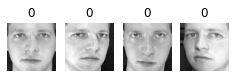

In [ ]:
plot_faces(X[:4], y)

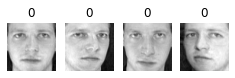

In [ ]:
plot_faces(pca.inverse_transform(pca.transform( X[:4] )), y[:4] )

In [ ]:
reconstruction_errors(pca, X_modify_faces).mean(axis=0)

0.00396842439576743

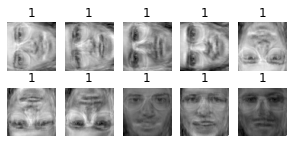

In [ ]:
plot_faces(X_modify_faces, y_modify)

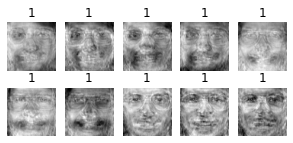

In [ ]:
X_modify_faces_reconstructed = pca.inverse_transform(X_modify_faces_pca)
plot_faces(X_modify_faces_reconstructed, y_modify)